# Preprocessing iSarcasm dataset to extract useful data from survey

The purpose of this section is to preprocess the iSarcasm dataset to determine data suitable for use in the primary research survey. The goal is to extract subsets of sarcastic and non-sarcastic tweets from the d

In [97]:
#Import libraries
import pandas as pd
import re
import numpy as np

In [2]:
#Read data in as CSV
df = pd.read_csv('isarcasm2022.csv')
df.head()

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Drop extraneous column
df.drop("Unnamed: 0", axis=1, inplace=True)

# Emoji containing subset

In [4]:
#Create subset of tweets which already contain emojis

#Convert non-string values to string format
df["tweet"] = df["tweet"].astype(str)

#Create a regex pattern to match emojis
emoji_pattern = re.compile("[\U0001F600-\U0001F64F" #Emoticons
                           "\U0001F300-\U0001F5FF"  #Symbols & pictographs
                           "\U0001F680-\U0001F6FF"  #Transport & map symbols
                           "\U0001F1E0-\U0001F1FF"  #Flags
                           "\U00002702-\U000027B0"  #Dingbats
                           "\U000024C2-\U0001F251"  #Enclosed characters
                           "]+", flags=re.UNICODE)

#Use the regex pattern to check if the tweet column contains emojis
df["has_emoji"] = df["tweet"].apply(lambda x: bool(re.search(emoji_pattern, x)))

#Extract the rows where the tweet column contains emojis
emoji_tweets = df[df["has_emoji"]]

#Display subset
emoji_tweets.head()

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,has_emoji
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0,True
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0,True
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0,True
16,My eldest is having a wild Friday night out. S...,1,My eldest is going to play bingo tonight.,1.0,1.0,0.0,0.0,0.0,0.0,True
24,@AsdaServiceTeam imagine your delivery being 2...,1,It's not acceptable for you to just refund my ...,1.0,0.0,0.0,0.0,0.0,0.0,True


In [5]:
#Check some of the tweets for emojis

#Select a random row from the DataFrame
random_row = emoji_tweets.sample(n=1)

#Retrieve the contents of the tweets column
random_tweet = random_row["tweet"].values[0]

#Print the tweet
print(random_tweet)

Love the people in my life, no matter what I go through, anytime I need to talk they’re always there to listen ❤️


In [6]:
#Check if all rows in the tweet column contain an emoji
all_rows_have_emoji = emoji_tweets["tweet"].str.contains(emoji_pattern).all()

#Display result
print(all_rows_have_emoji)

True


In [7]:
#Determine how many tweets already contain emojis
emoji_counts = df["has_emoji"].value_counts()

#Print the count
print(emoji_counts)

#I have 566 data points already containing emojis for my work

has_emoji
False    2902
True      566
Name: count, dtype: int64


In [8]:
#Determine how many tweets containing emojis are sarcastic/non-sarcastic
sarcasm_counts = emoji_tweets["sarcastic"].value_counts()

#Print the count
print(sarcasm_counts)

#164 of the emoji containing tweets are sarcastic at present

sarcastic
0    402
1    164
Name: count, dtype: int64


# No emoji subset

In [9]:
# Create a subset of rows where "has_emoji" column is False
no_emoji_tweets = df[df["has_emoji"] == False].copy()

# Print the subset DataFrame
no_emoji_tweets.head()

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,has_emoji
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0,False
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0,False
5,"@jimrossignol I choose to interpret it as ""XD""...",1,It's a terrible name and the product sounds aw...,0.0,1.0,0.0,1.0,0.0,0.0,False
6,Why would Alexa's recipe for Yorkshire pudding...,1,Great recipe from Alexa,0.0,1.0,0.0,0.0,0.0,1.0,False
7,someone hit me w a horse tranquilizer istg ive...,1,Simply “I’m miserable.”,1.0,0.0,0.0,0.0,0.0,0.0,False


In [10]:
#Check some of the tweets for emojis

#Select a random row from the DataFrame
random_row = no_emoji_tweets.sample(n=1)

#Retrieve the contents of the tweets column
random_tweet = random_row["tweet"].values[0]

#Print the tweet
print(random_tweet)

Anyone else with AT&amp;T have no cell service?


In [11]:
#Verify no tweets in the subset contain emojis
none_of_the_rows_have_emoji = not no_emoji_tweets["tweet"].str.contains(emoji_pattern).any()

#Display the results
print(none_of_the_rows_have_emoji)

True


In [12]:
#Determine how many tweets not containing emojis are sarcastic/non-sarcastic
sarcasm_counts = no_emoji_tweets["sarcastic"].value_counts()

#Print the count
print(sarcasm_counts)

sarcastic
0    2199
1     703
Name: count, dtype: int64


In [13]:
#Create the subsets for the survey

#Create sarcastic/ non-sarcastic tweets subsets
sarc = df[df["sarcastic"] == 1].copy()
nonsarc = df[df["sarcastic"] == 0].copy()

#Check content
sarc.shape, nonsarc.shape

((867, 10), (2601, 10))

In [14]:
#Create subsets containing tweets w/o emojis for both
sarc_noemo = sarc[~sarc["tweet"].str.contains(emoji_pattern)].copy()
nonsarc_noemo = nonsarc[~nonsarc["tweet"].str.contains(emoji_pattern)].copy()

#Check content
sarc_noemo.shape, nonsarc_noemo.shape

((703, 10), (2199, 10))

In [15]:
#Not all of the non-sarcatic tweets without emojis will be used for the survey- randomly select the necessary amount

#Randomly sample 465 rows
nonsarc_noemo_ss = nonsarc_noemo.sample(n=465, random_state=42)

#Check content
nonsarc_noemo_ss.shape

(465, 10)

In [16]:
#Export to CSV to input into survey
nonsarc_noemo.to_csv('nonsarc_noemoji_surveyqs.csv', index=False)

In [17]:
#Repeat for sarcastic emojis
sarc_noemo.to_csv('sarc_noemoji_surveyqs.csv', index=False)

# Processing results

In [18]:
#Importing isarcasm dataset
df_isarcasm = pd.read_csv('isarcasm2022.csv')
df_isarcasm.head()

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Importing survey results
df_survey = pd.read_excel('survey_results_data.xlsx')
df_survey.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...
1,1,Yes,Yes,Female,18-24,@WalesOnline Riveting news.,I don't know,@WalesOnline Riveting news.
2,1,Yes,Yes,Female,18-24,"""My (extended) fam was discussing going on a t...",It is sarcastic,"""My (extended) fam was discussing going on a t..."
3,1,Yes,Yes,Female,18-24,i love shoegaze sm,It is sarcastic,i love shoegaze sm 😁
4,1,Yes,Yes,Female,18-24,men are so grimey,It is sarcastic,men are so grimey 😢


# Stats for survey results

In [20]:
#How many responses 
df_survey['participant_no'].nunique()

87

In [21]:
#All over 18?
df_survey['over_18'].nunique()

1

In [22]:
#All emoji users?
df_survey['use_emojis'].nunique()

1

In [23]:
#Gender response breakdown

#Remove all but one response from each participant
df_unique_participants = df_survey.drop_duplicates(subset='participant_no')

#Check responses by gender
df_unique_participants['gender'].value_counts()

gender
Female                 49
Male                   35
I don't want to say     1
Other                   1
Queer                   1
Name: count, dtype: int64

In [24]:
#Age response breakdown
print('Overall age breakdown:')
print(df_unique_participants['age'].value_counts())

#Break down by gender
male_subset = df_unique_participants[df_unique_participants['gender'] == 'Male']
print('Breakdown for male respondents:')
print(male_subset['age'].value_counts())
    
female_subset = df_unique_participants[df_unique_participants['gender'] == 'Female']
print('Breakdown for female respondents:')
print(female_subset['age'].value_counts())

Overall age breakdown:
age
25-34    29
18-24    27
35-44    24
45-64     7
Name: count, dtype: int64
Breakdown for male respondents:
age
18-24    11
35-44    11
25-34     8
45-64     5
Name: count, dtype: int64
Breakdown for female respondents:
age
25-34    19
18-24    15
35-44    13
45-64     2
Name: count, dtype: int64


In [25]:
#Check distribution of classifications
df_survey['class_survey'].value_counts()

class_survey
It is not sarcastic    359
It is sarcastic        345
I don't know           128
Name: count, dtype: int64

In [26]:
#Break this down by gender

#Remake the gender subsets to include all responses
male_subset = df_survey[df_survey['gender'] == 'Male']
female_subset = df_survey[df_survey['gender'] == 'Female']

print('Male response breakdown:')
print(male_subset['class_survey'].value_counts())

print('Female response breakdown:')
print(female_subset['class_survey'].value_counts())

Male response breakdown:
class_survey
It is sarcastic        141
It is not sarcastic    135
I don't know            58
Name: count, dtype: int64
Female response breakdown:
class_survey
It is not sarcastic    209
It is sarcastic        196
I don't know            63
Name: count, dtype: int64


In [27]:
#Break this down by ages
a_subset = df_survey[df_survey['age'] == '18-24']
b_subset = df_survey[df_survey['age'] == '25-34']
c_subset = df_survey[df_survey['age'] == '35-44']
d_subset = df_survey[df_survey['age'] == '45-64']

print('18-24 age group response breakdown:')
print(a_subset['class_survey'].value_counts())

print('25-34 age group response breakdown:')
print(b_subset['class_survey'].value_counts())

print('35-44 age group response breakdown:')
print(c_subset['class_survey'].value_counts())

print('45-64 age group response breakdown:')
print(d_subset['class_survey'].value_counts())

18-24 age group response breakdown:
class_survey
It is not sarcastic    114
It is sarcastic        111
I don't know            35
Name: count, dtype: int64
25-34 age group response breakdown:
class_survey
It is not sarcastic    130
It is sarcastic        114
I don't know            50
Name: count, dtype: int64
35-44 age group response breakdown:
class_survey
It is sarcastic        95
It is not sarcastic    83
I don't know           35
Name: count, dtype: int64
45-64 age group response breakdown:
class_survey
It is not sarcastic    32
It is sarcastic        25
I don't know            8
Name: count, dtype: int64


# Quality control question evaluation

In [28]:
#Search for columns that contain the first QC question
phrase = 'caffeine addiction'
qc = df_survey[df_survey['original_text'].str.contains(phrase, case=False)]

# Print the rows where the phrase was found
qc.head(10)

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
0,1,Yes,Yes,Female,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college was a caffei...
10,2,Yes,Yes,Male,18-24,The only thing I got from college was a caffei...,It is sarcastic,The only thing I got from college is a caffein...
20,3,Yes,Yes,I don't want to say,25-34,The only thing I got from college is a caffein...,It is sarcastic,The only thing I got from college is a caffein...
30,4,Yes,Yes,Female,18-24,The only thing I got from college is a caffein...,It is sarcastic,The only thing I got from college is a caffein...
40,5,Yes,Yes,Female,18-24,The only thing I got from college is a caffein...,It is sarcastic,The only thing I got from college is a caffein...
50,6,Yes,Yes,Male,18-24,The only thing I got from college is a caffein...,It is sarcastic,The only thing I got from college is a caffein...
143,15,Yes,Yes,Female,18-24,The only thing I got from college is a caffein...,It is sarcastic,The only thing I got from college is a caffein...


In [29]:
#Breakdown of responses for this question
qc['class_survey'].value_counts()

class_survey
It is sarcastic    7
Name: count, dtype: int64

In [30]:
#Print the responses
print('Response 1:')
print(qc['edited_text'].iloc[0])
print('Age:')
print(qc['age'].iloc[0])
print('Gender:')
print(qc['gender'].iloc[0])
print('')
print('Response 2:')
print(qc['edited_text'].iloc[1])
print('Age:')
print(qc['age'].iloc[1])
print('Gender:')
print(qc['gender'].iloc[1])
print('')
print('Response 3:')
print(qc['edited_text'].iloc[2])
print('Age:')
print(qc['age'].iloc[2])
print('Gender:')
print(qc['gender'].iloc[2])
print('')
print('Response 4:')
print(qc['edited_text'].iloc[3])
print('Age:')
print(qc['age'].iloc[3])
print('Gender:')
print(qc['gender'].iloc[3])
print('')
print('Response 5:')
print(qc['edited_text'].iloc[4])
print('Age:')
print(qc['age'].iloc[4])
print('Gender:')
print(qc['gender'].iloc[4])
print('')
print('Response 6:')
print(qc['edited_text'].iloc[5])
print('Age:')
print(qc['age'].iloc[5])
print('Gender:')
print(qc['gender'].iloc[5])
print('')
print('Response 7:')
print(qc['edited_text'].iloc[6])
print('Age:')
print(qc['age'].iloc[6])
print('Gender:')
print(qc['gender'].iloc[6])

Response 1:
The only thing I got from college was a caffeine addiction 😏
Age:
18-24
Gender:
Female

Response 2:
The only thing I got from college is a caffeine addiction 😭
Age:
18-24
Gender:
Male

Response 3:
The only thing I got from college is a caffeine addiction 😂
Age:
25-34
Gender:
I don't want to say

Response 4:
The only thing I got from college is a caffeine addiction 🤠
Age:
18-24
Gender:
Female

Response 5:
The only thing I got from college is a caffeine addiction😭
Age:
18-24
Gender:
Female

Response 6:
The only thing I got from college is a caffeine addiction 😵‍💫😭😞🫠
Age:
18-24
Gender:
Male

Response 7:
The only thing I got from college is a caffeine addiction 😂
Age:
18-24
Gender:
Female


In [31]:
#Search for columns that contain the first QC question
phrase = 'business casual attire'
qc = df_survey[df_survey['original_text'].str.contains(phrase, case=False)]

# Print the rows where the phrase was found
qc.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
555,59,Yes,Yes,Female,25-34,was not aware that Crocs were appropriate busi...,It is sarcastic,was not aware that Crocs were appropriate busi...
754,80,Yes,Yes,Female,35-44,was not aware that Crocs were appropriate busi...,It is sarcastic,was not aware that Crocs were appropriate busi...
764,81,Yes,Yes,Female,35-44,was not aware that Crocs were appropriate busi...,It is sarcastic,was not aware that Crocs were appropriate busi...
774,82,Yes,Yes,Female,25-34,was not aware that Crocs were appropriate busi...,It is sarcastic,was not aware that Crocs were appropriate busi...
784,83,Yes,Yes,Female,45-64,was not aware that Crocs were appropriate busi...,It is sarcastic,was not aware that Crocs were appropriate busi...


In [32]:
#Breakdown of responses for this question
qc['class_survey'].value_counts()

class_survey
It is sarcastic    7
Name: count, dtype: int64

In [33]:
#Print the responses
print('Response 1:')
print(qc['edited_text'].iloc[0])
print('Age:')
print(qc['age'].iloc[0])
print('Gender:')
print(qc['gender'].iloc[0])
print('')
print('Response 2:')
print(qc['edited_text'].iloc[1])
print('Age:')
print(qc['age'].iloc[1])
print('Gender:')
print(qc['gender'].iloc[1])
print('')
print('Response 3:')
print(qc['edited_text'].iloc[2])
print('Age:')
print(qc['age'].iloc[2])
print('Gender:')
print(qc['gender'].iloc[2])
print('')
print('Response 4:')
print(qc['edited_text'].iloc[3])
print('Age:')
print(qc['age'].iloc[3])
print('Gender:')
print(qc['gender'].iloc[3])
print('')
print('Response 5:')
print(qc['edited_text'].iloc[4])
print('Age:')
print(qc['age'].iloc[4])
print('Gender:')
print(qc['gender'].iloc[4])
print('')
print('Response 6:')
print(qc['edited_text'].iloc[5])
print('Age:')
print(qc['age'].iloc[5])
print('Gender:')
print(qc['gender'].iloc[5])
print('')
print('Response 7:')
print(qc['edited_text'].iloc[6])
print('Age:')
print(qc['age'].iloc[6])
print('Gender:')
print(qc['gender'].iloc[6])

Response 1:
was not aware that Crocs were appropriate business casual attire.
Age:
25-34
Gender:
Female

Response 2:
was not aware that Crocs were appropriate business casual attire. 😒
Age:
35-44
Gender:
Female

Response 3:
was not aware that Crocs were appropriate business casual attire. 😅
Age:
35-44
Gender:
Female

Response 4:
was not aware that Crocs were appropriate business casual attire.😂
Age:
25-34
Gender:
Female

Response 5:
was not aware that Crocs were appropriate business casual attire. 🙄
Age:
45-64
Gender:
Female

Response 6:
was not aware that Crocs were appropriate business casual attire. 🙄
Age:
25-34
Gender:
Female

Response 7:
was not aware that Crocs were appropriate business casual attire.🤔
Age:
25-34
Gender:
Female


In [34]:
#Search for columns that contain the first QC question
phrase = 'villains in super hero films'
qc = df_survey[df_survey['original_text'].str.contains(phrase, case=False)]

# Print the rows where the phrase was found
qc.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
60,7,Yes,Yes,Female,35-44,The villains in super hero films are awfully p...,It is sarcastic,The villains in super hero films are awfully p...
71,8,Yes,Yes,Female,25-34,The villains in super hero films are awfully p...,It is sarcastic,The villains in super hero films are awfully p...
81,9,Yes,Yes,Female,25-34,The villains in super hero films are awfully p...,It is sarcastic,The villains in super hero films are awfully p...
91,10,Yes,Yes,Other,25-34,The villains in super hero films are awfully p...,It is not sarcastic,The villains in super hero films are awfully p...
101,11,Yes,Yes,Female,25-34,The villains in super hero films are awfully p...,It is sarcastic,The villains in super hero films are awfully p...


In [35]:
#Breakdown of responses for this question
qc['class_survey'].value_counts()

class_survey
It is sarcastic        16
It is not sarcastic     2
I don't know            1
Name: count, dtype: int64

In [36]:
#Print the sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is sarcastic']

print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])
print('')
print('Response 3:')
print(subset_qc['edited_text'].iloc[2])
print('Age:')
print(subset_qc['age'].iloc[2])
print('Gender:')
print(subset_qc['gender'].iloc[2])
print('')
print('Response 4:')
print(subset_qc['edited_text'].iloc[3])
print('Age:')
print(subset_qc['age'].iloc[3])
print('Gender:')
print(subset_qc['gender'].iloc[3])
print('')
print('Response 5:')
print(subset_qc['edited_text'].iloc[4])
print('Age:')
print(subset_qc['age'].iloc[4])
print('Gender:')
print(subset_qc['gender'].iloc[4])
print('')
print('Response 6:')
print(subset_qc['edited_text'].iloc[5])
print('Age:')
print(subset_qc['age'].iloc[5])
print('Gender:')
print(subset_qc['gender'].iloc[5])
print('')
print('Response 7:')
print(subset_qc['edited_text'].iloc[6])
print('Age:')
print(subset_qc['age'].iloc[6])
print('Gender:')
print(subset_qc['gender'].iloc[6])
print('Response 8:')
print(subset_qc['edited_text'].iloc[7])
print('Age:')
print(subset_qc['age'].iloc[7])
print('Gender:')
print(subset_qc['gender'].iloc[7])
print('')
print('Response 9:')
print(subset_qc['edited_text'].iloc[8])
print('Age:')
print(subset_qc['age'].iloc[8])
print('Gender:')
print(subset_qc['gender'].iloc[8])
print('')
print('Response 10:')
print(subset_qc['edited_text'].iloc[9])
print('Age:')
print(subset_qc['age'].iloc[9])
print('Gender:')
print(subset_qc['gender'].iloc[9])
print('')
print('Response 11:')
print(subset_qc['edited_text'].iloc[10])
print('Age:')
print(subset_qc['age'].iloc[10])
print('Gender:')
print(subset_qc['gender'].iloc[10])
print('')
print('Response 12:')
print(subset_qc['edited_text'].iloc[11])
print('Age:')
print(subset_qc['age'].iloc[11])
print('Gender:')
print(subset_qc['gender'].iloc[11])
print('')
print('Response 13:')
print(subset_qc['edited_text'].iloc[12])
print('Age:')
print(subset_qc['age'].iloc[12])
print('Gender:')
print(subset_qc['gender'].iloc[12])
print('')
print('Response 14:')
print(subset_qc['edited_text'].iloc[13])
print('Age:')
print(subset_qc['age'].iloc[13])
print('Gender:')
print(subset_qc['gender'].iloc[13])
print('Response 15:')
print(subset_qc['edited_text'].iloc[14])
print('Age:')
print(subset_qc['age'].iloc[14])
print('Gender:')
print(subset_qc['gender'].iloc[14])
print('')
print('Response 16:')
print(subset_qc['edited_text'].iloc[15])
print('Age:')
print(subset_qc['age'].iloc[15])
print('Gender:')
print(subset_qc['gender'].iloc[15])

Response 1:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city
Age:
35-44
Gender:
Female

Response 2:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city 😌
Age:
25-34
Gender:
Female

Response 3:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city 😉
Age:
25-34
Gender:
Female

Response 4:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city 😂
Age:
25-34
Gender:
Female

Response 5:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city💀
Age:
35-44
Gender:
Male

Response 6:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city 😉
Age:
25-34
Gender:
Female

Response 7:
The

In [37]:
#Print the non sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is not sarcastic']

print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])

Response 1:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city 🤔
Age:
25-34
Gender:
Other

Response 2:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city😡
Age:
25-34
Gender:
Female


In [38]:
#Print the unknown responses
subset_qc = qc[qc['class_survey'] == "I don't know"]

print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')

Response 1:
The villains in super hero films are awfully polite. They always confine their invasions to being above one particular city
Age:
18-24
Gender:
Female



In [39]:
#Search for columns that contain the first QC question
phrase = 'season 4 of trump does america'
qc = df_survey[df_survey['original_text'].str.contains(phrase, case=False)]

# Print the rows where the phrase was found
qc.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
410,44,Yes,Yes,Male,18-24,Loving season 4 of trump does America. Funnies...,It is sarcastic,Loving season 4 of trump does America. Funnies...
420,45,Yes,Yes,Male,35-44,Loving season 4 of trump does America. Funnies...,It is not sarcastic,Loving season 4 of trump does America. 😜Funnie...
430,46,Yes,Yes,Male,45-64,Loving season 4 of trump does America. Funnies...,It is sarcastic,Loving season 4 of trump does America. Funnies...
440,47,Yes,Yes,Male,25-34,Loving season 4 of trump does America. Funnies...,I don't know,Loving season 4 of trump does America. Funnies...
442,48,Yes,Yes,Female,25-34,Loving season 4 of trump does America. Funnies...,I don't know,Loving season 4 of trump does America. Funnies...


In [40]:
#Breakdown of responses for this question
qc['class_survey'].value_counts()

class_survey
It is sarcastic        2
It is not sarcastic    2
I don't know           2
Name: count, dtype: int64

In [41]:
#Print the sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is sarcastic']
print('Sarcastic Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])

#Print non sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is not sarcastic']
print('Non-Sarcastic Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])

#Print unknown sarcastic responses
subset_qc = qc[qc['class_survey'] == "I don't know"]
print('Unknown Classification Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])

Sarcastic Responses:
Response 1:
Loving season 4 of trump does America. Funniest season yet #DonaldTrump #Trump #MAGA #MAGA2020 🤡🤡
Age:
18-24
Gender:
Male

Response 2:
Loving season 4 of trump does America. Funniest season yet #DonaldTrump #Trump #MAGA #MAGA2020 😉
Age:
45-64
Gender:
Male
Non-Sarcastic Responses:
Response 1:
Loving season 4 of trump does America. 😜Funniest season yet 😂 #DonaldTrump #Trump #MAGA #MAGA2020
Age:
35-44
Gender:
Male

Response 2:
Loving season 4 of trump does America. Funniest season yet 🤣🙏🇺🇸🇺🇸🇺🇸#DonaldTrump #Trump #MAGA #MAGA2020
Age:
18-24
Gender:
Female
Unknown Classification Responses:
Response 1:
Loving season 4 of trump does America. Funniest season yet 🤣 #DonaldTrump #Trump #MAGA #MAGA2020
Age:
25-34
Gender:
Male

Response 2:
Loving season 4 of trump does America. Funniest season yet #DonaldTrump #Trump #MAGA #MAGA2020
Age:
25-34
Gender:
Female


In [42]:
#Search for columns that contain the first QC question
phrase = 'thank you, science'
qc = df_survey[df_survey['original_text'].str.contains(phrase, case=False)]

# Print the rows where the phrase was found
qc.head()

,participant_no,over_18,use_emojis,gender,age,original_text,class_survey,edited_text
255,27,Yes,Yes,Male,25-34,"Vaccine dose 1. Thank you, science.",I don't know,"Vaccine dose 1. Thank you, science."
283,30,Yes,Yes,Male,18-24,"Vaccine dose 1. Thank you, science.",It is not sarcastic,"Vaccine dose 1. Thank you, science.👍"
311,33,Yes,Yes,Female,35-44,"Vaccine dose 1. Thank you, science.",It is sarcastic,"Vaccine dose 1. Thank you, science. 💀"
339,36,Yes,Yes,Female,25-34,"Vaccine dose 1. Thank you, science.",It is sarcastic,"Vaccine dose 1. Thank you, science. 😜"
367,39,Yes,Yes,Male,18-24,"Vaccine dose 1. Thank you, science.",It is not sarcastic,"Vaccine dose 1. Thank you, science.👍"


In [43]:
#Breakdown of responses for this question
qc['class_survey'].value_counts()

class_survey
It is not sarcastic    3
It is sarcastic        2
I don't know           1
Name: count, dtype: int64

In [44]:
#Print the sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is sarcastic']
print('Sarcastic Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])

#Print non sarcastic responses
subset_qc = qc[qc['class_survey'] == 'It is not sarcastic']
print('Non-Sarcastic Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])
print('')
print('Response 2:')
print(subset_qc['edited_text'].iloc[1])
print('Age:')
print(subset_qc['age'].iloc[1])
print('Gender:')
print(subset_qc['gender'].iloc[1])
print('Response 3:')
print(subset_qc['edited_text'].iloc[2])
print('Age:')
print(subset_qc['age'].iloc[2])
print('Gender:')
print(subset_qc['gender'].iloc[2])

#Print unknown sarcastic responses
subset_qc = qc[qc['class_survey'] == "I don't know"]
print('Unknown Classification Responses:')
print('Response 1:')
print(subset_qc['edited_text'].iloc[0])
print('Age:')
print(subset_qc['age'].iloc[0])
print('Gender:')
print(subset_qc['gender'].iloc[0])

Sarcastic Responses:
Response 1:
Vaccine dose 1. Thank you, science. 💀
Age:
35-44
Gender:
Female

Response 2:
Vaccine dose 1. Thank you, science. 😜
Age:
25-34
Gender:
Female
Non-Sarcastic Responses:
Response 1:
Vaccine dose 1. Thank you, science.👍
Age:
18-24
Gender:
Male

Response 2:
Vaccine dose 1. Thank you, science.👍
Age:
18-24
Gender:
Male
Response 3:
Vaccine dose 1. Thank you, science. 💛
Age:
18-24
Gender:
Male
Unknown Classification Responses:
Response 1:
Vaccine dose 1. Thank you, science.
Age:
25-34
Gender:
Male


# Emoji use frequency

In [102]:
#Importing libraries
import emoji
from statistics import mean
import demoji
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from scipy import stats
import random

In [46]:
#Make a subsets based on classifications
sarc = df_survey[df_survey['class_survey'] == 'It is sarcastic']
nonsarc = df_survey[df_survey['class_survey'] == 'It is not sarcastic']
idk = df_survey[df_survey['class_survey'] == "I don't know"]

In [47]:
#Determine the average number of emojis used in a sarcastic tweet

#Make a list to hold number of emojis per tweet after editing
emojis_per_string = []

#Determin the number of emojis per tweet
for text in sarc['edited_text']:
    emoji_count = len(demoji.findall(text))
    emojis_per_string.append(emoji_count)

#Average over the df
average_emojis_per_string = mean(emojis_per_string)

#Print result
print("Average emojis per string:", average_emojis_per_string)

Average emojis per string: 0.9797101449275363


In [48]:
#Determine the average number of emojis used in a non sarcastic tweet

#Make a list to hold number of emojis per tweet after editing
emojis_per_string = []

#Determin the number of emojis per tweet
for text in nonsarc['edited_text']:
    emoji_count = len(demoji.findall(text))
    emojis_per_string.append(emoji_count)

#Average over the df
average_emojis_per_string = mean(emojis_per_string)

#Print result
print("Average emojis per string:", average_emojis_per_string)

Average emojis per string: 0.6072423398328691


In [49]:
#Determine the average number of emojis used in a tweet of unknown classification

#Make a list to hold number of emojis per tweet after editing
emojis_per_string = []

#Determin the number of emojis per tweet
for text in idk['edited_text']:
    emoji_count = len(demoji.findall(text))
    emojis_per_string.append(emoji_count)

#Average over the df
average_emojis_per_string = mean(emojis_per_string)

#Print result
print("Average emojis per string:", average_emojis_per_string)

Average emojis per string: 0.296875


In [50]:
#Determine if there is statistical significance between the means

#First determine if parametric/non-parametric tests are suitable

#Check if the average emojis is normally distributed using the shapiro wilk test

#Make a list to hold number of emojis per tweet after editing
sarc_emojis_per_string = []

#Determin the number of emojis per tweet
for text in sarc['edited_text']:
    emoji_count = len(demoji.findall(text))
    sarc_emojis_per_string.append(emoji_count)

#Perform shapiro wilk test
statistic, p_value = shapiro(sarc_emojis_per_string)

#Check the p-value to determine if the data follows a normal distribution
alpha = 0.05
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject null hypothesis)")

The data does not follow a normal distribution (reject null hypothesis)


In [51]:
#Repeat for nonsarcastic tweets
#Make a list to hold number of emojis per tweet after editing
nonsarc_emojis_per_string = []

#Determin the number of emojis per tweet
for text in nonsarc['edited_text']:
    emoji_count = len(demoji.findall(text))
    nonsarc_emojis_per_string.append(emoji_count)

#Perform shapiro wilk test
statistic, p_value = shapiro(nonsarc_emojis_per_string)

#Check the p-value to determine if the data follows a normal distribution
alpha = 0.05
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject null hypothesis)")

The data does not follow a normal distribution (reject null hypothesis)


In [52]:
#Get the length of each list
print(len(sarc_emojis_per_string), len(nonsarc_emojis_per_string))

345 359


In [53]:
#Reduce the length of nonsarc to even out the data
nonsarc_emojis_per_string = random.sample(nonsarc_emojis_per_string, 345)
len(nonsarc_emojis_per_string)

345

In [54]:
#Non parametric test is suitable

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarc_emojis_per_string, nonsarc_emojis_per_string)

# Check the p-value to determine if there's a significant difference
alpha = 0.05  # significance level
if p_value > alpha:
    print("There's no significant difference between the number of emojis in the string (fail to reject null hypothesis)")
else:
    print("There's a significant difference between the number of emojis in the string (reject null hypothesis)")

There's a significant difference between the number of emojis in the string (reject null hypothesis)


# Emoji position in text

In [55]:
#Determine the average position of an emoji in a sarcastic tweet

sarc_emoji_positions = []

for text in sarc['edited_text']:
    emojis = demoji.findall(text)
    if emojis:
        emoji = list(emojis.keys())[0]
        emoji_position = text.find(emoji) / len(text)  # Normalize position to a range between 0 and 1
        sarc_emoji_positions.append(emoji_position)
    else:
        sarc_emoji_positions.append(1.0)  # Append 1.0 if no emoji is found

average_emoji_position = mean(sarc_emoji_positions)

print("Average position of emoji:", average_emoji_position)

Average position of emoji: 0.9495053622944432


In [56]:
#Determine the average position of an emoji in a non sarcastic tweet

nonsarc_emoji_positions = []

for text in nonsarc['edited_text']:
    emojis = demoji.findall(text)
    if emojis:
        emoji = list(emojis.keys())[0]
        emoji_position = text.find(emoji) / len(text)  # Normalize position to a range between 0 and 1
        nonsarc_emoji_positions.append(emoji_position)
    else:
        nonsarc_emoji_positions.append(1.0)  # Append 1.0 if no emoji is found

average_emoji_position = mean(nonsarc_emoji_positions)

print("Average position of emoji:", average_emoji_position)

Average position of emoji: 0.9722451031816735


In [57]:
#Determine the average position of an emoji in a tweet of unknown classification

emoji_positions = []

for text in idk['edited_text']:
    emojis = demoji.findall(text)
    if emojis:
        emoji = list(emojis.keys())[0]
        emoji_position = text.find(emoji) / len(text)  # Normalize position to a range between 0 and 1
        emoji_positions.append(emoji_position)
    else:
        emoji_positions.append(1.0)  # Append 1.0 if no emoji is found

average_emoji_position = mean(emoji_positions)

print("Average position of emoji:", average_emoji_position)

Average position of emoji: 0.9758845579170218


In [58]:
#Doesnt look like there is good evidence that emojis are placed in different locations here

#Use tests to check for statistical significance between means

#Determine if parametric/nonparametric test is appropriate first

#Check if data is normally distributed

#Perform shapiro wilk test
statistic, p_value = shapiro(sarc_emoji_positions)

#Check the p-value to determine if the data follows a normal distribution
alpha = 0.05
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject null hypothesis)")

The data does not follow a normal distribution (reject null hypothesis)


In [59]:
#Repeat for nonsarcastic tweets

#Perform shapiro wilk test
statistic, p_value = shapiro(nonsarc_emoji_positions)

#Check the p-value to determine if the data follows a normal distribution
alpha = 0.05
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject null hypothesis)")

The data does not follow a normal distribution (reject null hypothesis)


In [60]:
#Non parametric test is appropriate

#Get the length of each list
print(len(sarc_emoji_positions), len(nonsarc_emoji_positions))

345 359


In [61]:
#Reduce the length of nonsarc to even out the data
nonsarc_emoji_positions = random.sample(nonsarc_emoji_positions, 345)
len(nonsarc_emoji_positions)

345

In [62]:
#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sarc_emoji_positions, nonsarc_emoji_positions)

#Check the p-value to determine if there's a significant difference
alpha = 0.05  #significance level
if p_value > alpha:
    print("There's no significant difference in the location of emojis in the string (fail to reject null hypothesis)")
else:
    print("There's a significant difference in the location of emojis in the string (reject null hypothesis)")

There's a significant difference in the location of emojis in the string (reject null hypothesis)


# Sentiment polarity of the emojis in tweets

In [93]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene

In [64]:
#Make lists of all emojis that appear in the sarcastic tweets

#Create an empty list to store data
sarc_emojis_list = []

for text in sarc['edited_text']:
    emojis = demoji.findall(text)
    sarc_emojis_list.extend(emojis)
    
#Check the list
sarc_emojis_list

['😏',
 '😬',
 '😁',
 '😢',
 '😂',
 '🙈',
 '😊',
 '😂',
 '😭',
 '😡',
 '😂',
 '😶',
 '😒',
 '😐',
 '🤠',
 '😘',
 '💅',
 '😭',
 '🤔',
 '😞',
 '😵\u200d💫',
 '😭',
 '😥',
 '😒',
 '😫',
 '💃',
 '😭',
 '🤕',
 '🙃',
 '😌',
 '😬',
 '🧐',
 '😉',
 '😜',
 '😏',
 '💪',
 '😂',
 '😅',
 '💁🏻',
 '😂',
 '😃',
 '👍',
 '™',
 '🦸\u200d♀️',
 '💁\u200d♀️',
 '💀',
 '🙄',
 '🧠',
 '💀',
 '😍',
 '😒',
 '😂',
 '💀',
 '😏',
 '😂',
 '😊',
 '😂',
 '😏',
 '😁',
 '😅',
 '😁',
 '😉',
 '😒',
 '😅',
 '😅',
 '😳',
 '🙊',
 '😡',
 '😳',
 '😌',
 '😂',
 '🙈',
 '😂',
 '🙈',
 '😔',
 '😝',
 '😡',
 '😝',
 '🙈',
 '💛',
 '😅',
 '😡',
 '😏',
 '😔',
 '💀',
 '😅',
 '😅',
 '😢',
 '😍',
 '😅',
 '😔',
 '😞',
 '😒',
 '😝',
 '😂',
 '😂',
 '😌',
 '😝',
 '🙈',
 '😅',
 '😂',
 '😞',
 '😢',
 '😂',
 '😏',
 '😁',
 '😂',
 '😂',
 '🙃',
 '🤣',
 '💃',
 '😅',
 '🤣',
 '🤪',
 '🤣',
 '😂',
 '🤪',
 '🙄',
 '😕',
 '😏',
 '😂',
 '😕',
 '😂',
 '😏',
 '😆',
 '😂',
 '😆',
 '😏',
 '😅',
 '😌',
 '😭',
 '💀',
 '😭',
 '🥰',
 '😭',
 '💀',
 '🤡',
 '🤠',
 '💀',
 '🤧',
 '🙂',
 '🥰',
 '🥰',
 '👍',
 '😘',
 '😜',
 '😀',
 '😀',
 '😘',
 '😂',
 '😁',
 '😒',
 '👍',
 '😒',
 '😅',
 '😊',
 '😂',
 '😞',
 '😒',
 '😔',
 '😒',
 '😘',
 '😝'

In [65]:
#Repeat for the non sarcastic tweets

#Create an empty list to store data
nonsarc_emojis_list = []

for text in nonsarc['edited_text']:
    emojis = demoji.findall(text)
    nonsarc_emojis_list.extend(emojis)
    
#Check the list
nonsarc_emojis_list

['😂',
 '😁',
 '😭',
 '😢',
 '😊',
 '😇',
 '😒',
 '🤔',
 '🙂',
 '😂',
 '😅',
 '🤔',
 '😩',
 '💩',
 '☺️',
 '👏🏼',
 '😖',
 '🥰',
 '😖',
 '😬',
 '🤔',
 '😳',
 '😑',
 '😭',
 '😊',
 '👍',
 '😍',
 '😔',
 '💛',
 '👍',
 '😀',
 '😅',
 '😍',
 '😒',
 '😂',
 '😡',
 '😊',
 '😒',
 '😳',
 '👍',
 '😒',
 '😅',
 '👍',
 '😅',
 '😬',
 '👍',
 '🙊',
 '😱',
 '🤗',
 '🤠',
 '😭',
 '😉',
 '👍',
 '😱',
 '😡',
 '😁',
 '👍',
 '😔',
 '😀',
 '😡',
 '😂',
 '😘',
 '🙈',
 '😂',
 '😊',
 '😝',
 '👍',
 '😞',
 '😂',
 '😭',
 '😂',
 '😭',
 '😀',
 '😒',
 '😂',
 '😝',
 '😭',
 '👍',
 '😂',
 '😂',
 '😌',
 '😬',
 '😍',
 '😊',
 '😭',
 '😬',
 '😭',
 '😭',
 '😁',
 '😂',
 '😂',
 '💛',
 '😭',
 '😔',
 '🙈',
 '😍',
 '😭',
 '😬',
 '😂',
 '😜',
 '😬',
 '😢',
 '🤨',
 '🧐',
 '😔',
 '😳',
 '😡',
 '🙈',
 '😞',
 '😡',
 '😍',
 '🙏',
 '🤣',
 '🇺🇸',
 '⭐',
 '😡',
 '💛',
 '😡',
 '😡',
 '👍',
 '💋',
 '🙈',
 '😢',
 '😁',
 '😬',
 '👍',
 '😭',
 '😒',
 '😝',
 '😁',
 '😡',
 '😡',
 '🤞🏼',
 '🍽',
 '😿',
 '🇬🇧',
 '😶',
 '🥶',
 '😥',
 '😬',
 '😶',
 '😔',
 '🙃',
 '😕',
 '😒',
 '🤭',
 '🙂',
 '😕',
 '🥴',
 '😉',
 '😵',
 '🥴',
 '😁',
 '☺️',
 '😇',
 '😁',
 '💛',
 '😒',
 '💪🏻',
 '❤️',
 '🥺',
 '🥰',
 '👌🏻',
 '😁',
 '😝',
 

In [66]:
#Check the length of each list
print(len(sarc_emojis_list), len(nonsarc_emojis_list))

338 218


In [67]:
#Import df containing sentiment information for all emojis
emotion_info = pd.read_csv('emoji_emotion_stats_all.csv')
emotion_info.head()

,emoji,anger,joy,sadness,fear,surprise,disgust,anticipation,trust,pred_neg,pred_pos,pred_neut,pred_sent_score
0,🇸🇰,0.074503,0.084563,0.061850,0.068795,0.072184,0.063562,0.081030,0.083386,0.061693,0.154219,0.784088,0.092526
1,👔,0.073802,0.074975,0.074787,0.080874,0.072140,0.048375,0.080391,0.084093,0.316915,0.099384,0.583700,-0.217531
2,🌀,0.080796,0.087879,0.073162,0.076530,0.076504,0.071957,0.085254,0.080753,0.087130,0.409846,0.503024,0.322716
3,🚾,0.079520,0.087601,0.106218,0.100683,0.084863,0.054167,0.095245,0.110732,0.145850,0.254009,0.600141,0.108159
4,👹,0.064922,0.077376,0.070871,0.071265,0.070346,0.052338,0.078957,0.085835,0.185388,0.172381,0.642231,-0.013007


In [72]:
#Check the average sent_score for each emotion in the list

#Create an empty list
sarc_emoji_sentiment = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_sent_score']
        sarc_emoji_sentiment[emoji] = sentiment_score
        
#Check the dictionary
for emoji, sentiment_score in sarc_emoji_sentiment.items():
    print(f"Emoji: {emoji}, Sentiment Score: {sentiment_score:.5f}")

Emoji: 😏, Sentiment Score: 0.31183
Emoji: 😬, Sentiment Score: -0.42355
Emoji: 😁, Sentiment Score: 0.74278
Emoji: 😢, Sentiment Score: -0.57921
Emoji: 😂, Sentiment Score: 0.13526
Emoji: 🙈, Sentiment Score: -0.05900
Emoji: 😊, Sentiment Score: 0.81604
Emoji: 😭, Sentiment Score: -0.24413
Emoji: 😡, Sentiment Score: -0.63490
Emoji: 😶, Sentiment Score: -0.36502
Emoji: 😒, Sentiment Score: -0.48609
Emoji: 😐, Sentiment Score: -0.38284
Emoji: 🤠, Sentiment Score: -0.00882
Emoji: 😘, Sentiment Score: 0.64959
Emoji: 💅, Sentiment Score: 0.25239
Emoji: 🤔, Sentiment Score: 0.06137
Emoji: 😞, Sentiment Score: -0.56845
Emoji: 😥, Sentiment Score: -0.51660
Emoji: 😫, Sentiment Score: -0.52948
Emoji: 💃, Sentiment Score: 0.47256
Emoji: 🤕, Sentiment Score: -0.07136
Emoji: 🙃, Sentiment Score: -0.13914
Emoji: 😌, Sentiment Score: 0.58776
Emoji: 🧐, Sentiment Score: 0.12837
Emoji: 😉, Sentiment Score: 0.66413
Emoji: 😜, Sentiment Score: 0.52508
Emoji: 💪, Sentiment Score: 0.44248
Emoji: 😅, Sentiment Score: 0.44144
Emoji:

In [73]:
#Repeat for the non sarcastic list

#Create an empty list
nonsarc_emoji_sentiment = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_sent_score']
        nonsarc_emoji_sentiment[emoji] = sentiment_score
        
#Check the dictionary
for emoji, sentiment_score in nonsarc_emoji_sentiment.items():
    print(f"Emoji: {emoji}, Sentiment Score: {sentiment_score:.5f}")

Emoji: 😂, Sentiment Score: 0.13526
Emoji: 😁, Sentiment Score: 0.74278
Emoji: 😭, Sentiment Score: -0.24413
Emoji: 😢, Sentiment Score: -0.57921
Emoji: 😊, Sentiment Score: 0.81604
Emoji: 😇, Sentiment Score: 0.40950
Emoji: 😒, Sentiment Score: -0.48609
Emoji: 🤔, Sentiment Score: 0.06137
Emoji: 🙂, Sentiment Score: 0.42841
Emoji: 😅, Sentiment Score: 0.44144
Emoji: 😩, Sentiment Score: -0.33688
Emoji: 💩, Sentiment Score: -0.61799
Emoji: ☺️, Sentiment Score: 0.78760
Emoji: 👏🏼, Sentiment Score: 0.66222
Emoji: 😖, Sentiment Score: -0.52833
Emoji: 🥰, Sentiment Score: 0.89894
Emoji: 😬, Sentiment Score: -0.42355
Emoji: 😳, Sentiment Score: -0.22367
Emoji: 😑, Sentiment Score: -0.54640
Emoji: 👍, Sentiment Score: 0.55644
Emoji: 😍, Sentiment Score: 0.79574
Emoji: 😔, Sentiment Score: -0.41109
Emoji: 💛, Sentiment Score: 0.70975
Emoji: 😀, Sentiment Score: 0.51481
Emoji: 😡, Sentiment Score: -0.63490
Emoji: 🙊, Sentiment Score: 0.36187
Emoji: 😱, Sentiment Score: -0.18614
Emoji: 🤗, Sentiment Score: 0.70781
Emoji:

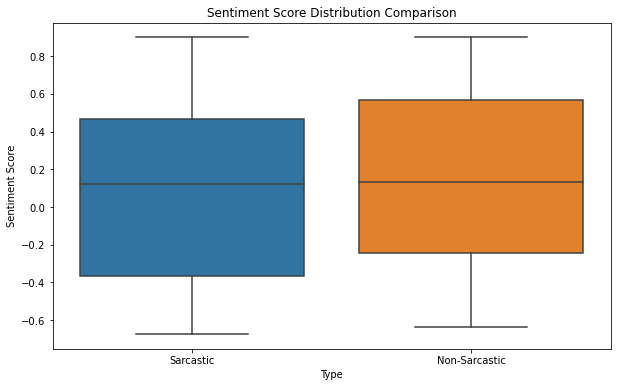

In [74]:
#Create boxplots to compare

#Convert dictionaries to lists
sarc_sentiment_scores = list(sarc_emoji_sentiment.values())
nonsarc_sentiment_scores = list(nonsarc_emoji_sentiment.values())

#Create a list indicating the type of sentiment scores
labels = ['Sarcastic'] * len(sarc_sentiment_scores) + ['Non-Sarcastic'] * len(nonsarc_sentiment_scores)

#Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels, y=sarc_sentiment_scores + nonsarc_sentiment_scores)
plt.title('Sentiment Score Distribution Comparison')
plt.xlabel('Type')
plt.ylabel('Sentiment Score')
plt.xticks([0, 1], ['Sarcastic', 'Non-Sarcastic'])
plt.show()

C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\1204058610.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sarc_sentiment_scores, label='Sarcastic', shade=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\1204058610.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonsarc_sentiment_scores, label='Non-Sarcastic', shade=True)


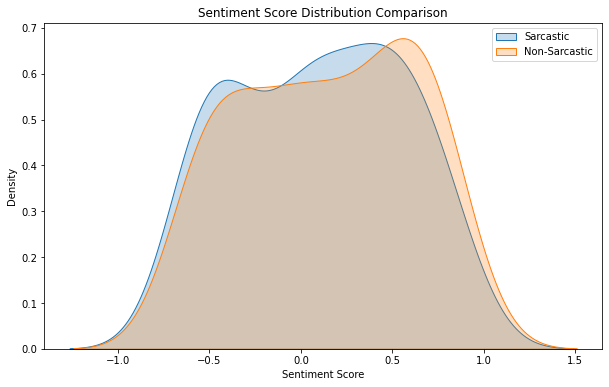

In [75]:
#Try a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sarc_sentiment_scores, label='Sarcastic', shade=True)
sns.kdeplot(nonsarc_sentiment_scores, label='Non-Sarcastic', shade=True)
plt.title('Sentiment Score Distribution Comparison')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [77]:
#Repeat breaking down by positive and negative sentiment in each case- sarcastic tweets first

#Create an empty list
pos_sarc_emoji_sentiment = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_pos']
        pos_sarc_emoji_sentiment[emoji] = sentiment_score
        
#Create an empty list
neg_sarc_emoji_sentiment = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neg']
        neg_sarc_emoji_sentiment[emoji] = sentiment_score
        
#Check one of the dictionaries
for emoji, sentiment_score in pos_sarc_emoji_sentiment.items():
    print(f"Emoji: {emoji}, Sentiment Score: {sentiment_score:.5f}")

Emoji: 😏, Sentiment Score: 0.37374
Emoji: 😬, Sentiment Score: 0.06319
Emoji: 😁, Sentiment Score: 0.75073
Emoji: 😢, Sentiment Score: 0.06826
Emoji: 😂, Sentiment Score: 0.32906
Emoji: 🙈, Sentiment Score: 0.17404
Emoji: 😊, Sentiment Score: 0.82371
Emoji: 😭, Sentiment Score: 0.15815
Emoji: 😡, Sentiment Score: 0.06003
Emoji: 😶, Sentiment Score: 0.08775
Emoji: 😒, Sentiment Score: 0.10243
Emoji: 😐, Sentiment Score: 0.10478
Emoji: 🤠, Sentiment Score: 0.21967
Emoji: 😘, Sentiment Score: 0.66925
Emoji: 💅, Sentiment Score: 0.33149
Emoji: 🤔, Sentiment Score: 0.22309
Emoji: 😞, Sentiment Score: 0.06258
Emoji: 😥, Sentiment Score: 0.08462
Emoji: 😫, Sentiment Score: 0.07174
Emoji: 💃, Sentiment Score: 0.50772
Emoji: 🤕, Sentiment Score: 0.20712
Emoji: 🙃, Sentiment Score: 0.12743
Emoji: 😌, Sentiment Score: 0.61157
Emoji: 🧐, Sentiment Score: 0.28250
Emoji: 😉, Sentiment Score: 0.67733
Emoji: 😜, Sentiment Score: 0.55727
Emoji: 💪, Sentiment Score: 0.51211
Emoji: 😅, Sentiment Score: 0.48480
Emoji: 💁🏻, Sentiment

In [79]:
#Repeat for nonsarcastic tweets

#Create an empty list
pos_nonsarc_emoji_sentiment = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_pos']
        pos_nonsarc_emoji_sentiment[emoji] = sentiment_score
        
#Create an empty list
neg_nonsarc_emoji_sentiment = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['pred_neg']
        neg_nonsarc_emoji_sentiment[emoji] = sentiment_score
        
#Check one of the dictionaries
for emoji, sentiment_score in pos_nonsarc_emoji_sentiment.items():
    print(f"Emoji: {emoji}, Sentiment Score: {sentiment_score:.5f}")

Emoji: 😂, Sentiment Score: 0.32906
Emoji: 😁, Sentiment Score: 0.75073
Emoji: 😭, Sentiment Score: 0.15815
Emoji: 😢, Sentiment Score: 0.06826
Emoji: 😊, Sentiment Score: 0.82371
Emoji: 😇, Sentiment Score: 0.43834
Emoji: 😒, Sentiment Score: 0.10243
Emoji: 🤔, Sentiment Score: 0.22309
Emoji: 🙂, Sentiment Score: 0.45417
Emoji: 😅, Sentiment Score: 0.48480
Emoji: 😩, Sentiment Score: 0.12331
Emoji: 💩, Sentiment Score: 0.06852
Emoji: ☺️, Sentiment Score: 0.79466
Emoji: 👏🏼, Sentiment Score: 0.68519
Emoji: 😖, Sentiment Score: 0.07573
Emoji: 🥰, Sentiment Score: 0.90969
Emoji: 😬, Sentiment Score: 0.06319
Emoji: 😳, Sentiment Score: 0.10199
Emoji: 😑, Sentiment Score: 0.07724
Emoji: 👍, Sentiment Score: 0.58571
Emoji: 😍, Sentiment Score: 0.81625
Emoji: 😔, Sentiment Score: 0.10229
Emoji: 💛, Sentiment Score: 0.72662
Emoji: 😀, Sentiment Score: 0.54111
Emoji: 😡, Sentiment Score: 0.06003
Emoji: 🙊, Sentiment Score: 0.40302
Emoji: 😱, Sentiment Score: 0.14290
Emoji: 🤗, Sentiment Score: 0.72337
Emoji: 🤠, Sentimen

C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\47090153.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pos_sarc_sentiment_scores, label='Positive', shade=True, ax=axes[0, 0])
C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\47090153.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(neg_sarc_sentiment_scores, label='Negative', shade=True, ax=axes[0, 0])
C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\47090153.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pos_nonsarc_sentiment_scores, label='Positive', shade=True, ax=axes[0, 1])
C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\47090153.py:16: FutureW

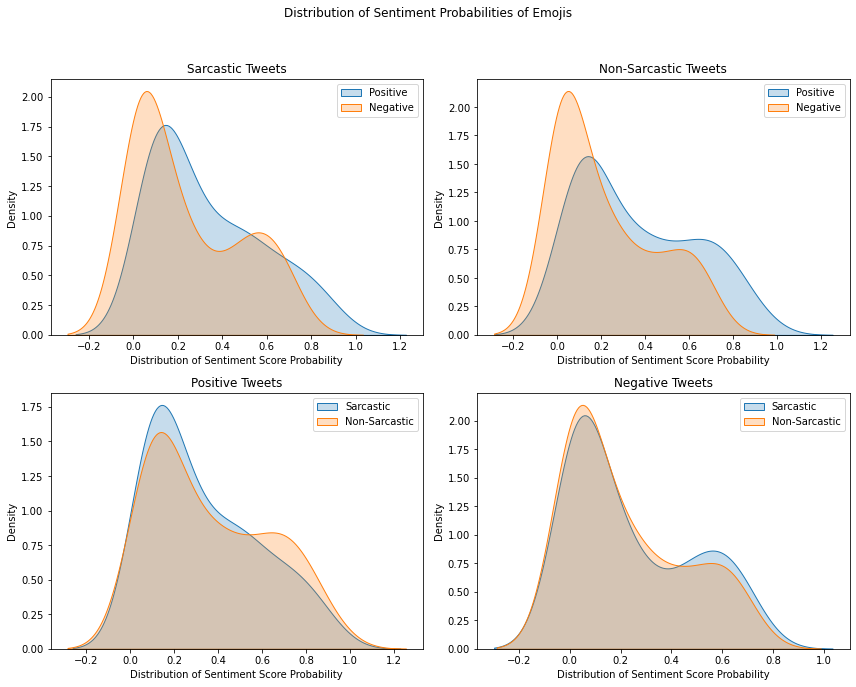

In [80]:
#Use KDE plots to compare

# Convert sentiment score dictionaries to lists
pos_sarc_sentiment_scores = list(pos_sarc_emoji_sentiment.values())
pos_nonsarc_sentiment_scores = list(pos_nonsarc_emoji_sentiment.values())
neg_sarc_sentiment_scores = list(neg_sarc_emoji_sentiment.values())
neg_nonsarc_sentiment_scores = list(neg_nonsarc_emoji_sentiment.values())

#Define layout of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#Define plot content
sns.kdeplot(pos_sarc_sentiment_scores, label='Positive', shade=True, ax=axes[0, 0])
sns.kdeplot(neg_sarc_sentiment_scores, label='Negative', shade=True, ax=axes[0, 0])
sns.kdeplot(pos_nonsarc_sentiment_scores, label='Positive', shade=True, ax=axes[0, 1])
sns.kdeplot(neg_nonsarc_sentiment_scores, label='Negative', shade=True, ax=axes[0, 1])
sns.kdeplot(pos_sarc_sentiment_scores, label='Sarcastic', shade=True, ax=axes[1, 0])
sns.kdeplot(pos_nonsarc_sentiment_scores, label='Non-Sarcastic', shade=True, ax=axes[1, 0])
sns.kdeplot(neg_sarc_sentiment_scores, label='Sarcastic', shade=True, ax=axes[1, 1])
sns.kdeplot(neg_nonsarc_sentiment_scores, label='Non-Sarcastic', shade=True, ax=axes[1, 1])

#Set subplot titles
axes[0, 0].set_title('Sarcastic Tweets')
axes[0, 1].set_title('Non-Sarcastic Tweets')
axes[1, 0].set_title('Positive Tweets')
axes[1, 1].set_title('Negative Tweets')

#Add legends to each subplot
axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()

#Add axis titles for each subplot
axes[0, 0].set_xlabel('Distribution of Sentiment Score Probability')
axes[0, 0].set_ylabel('Density')
axes[0, 1].set_xlabel('Distribution of Sentiment Score Probability')
axes[0, 1].set_ylabel('Density')
axes[1, 0].set_xlabel('Distribution of Sentiment Score Probability')
axes[1, 0].set_ylabel('Density')
axes[1, 1].set_xlabel('Distribution of Sentiment Score Probability')
axes[1, 1].set_ylabel('Density')

#Set overall title
plt.suptitle('Distribution of Sentiment Probabilities of Emojis')

#Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#Show the plot
plt.show()

In [81]:
#Check for statistical significance in the positivity/negativity emojis in positive/negative tweets

#Check the length of each list
print(len(pos_sarc_sentiment_scores), len(neg_sarc_sentiment_scores))

70 70


In [84]:
#Check for statistical significance in the positivity/negativity of emojis in sarcastic tweets

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(pos_sarc_sentiment_scores, neg_sarc_sentiment_scores)

#Check the p-value to determine if there's a significant difference
alpha = 0.05  #significance level
if p_value > alpha:
    print("There's no significant difference in the location of emojis in the string (fail to reject null hypothesis)")
else:
    print("There's a significant difference in the location of emojis in the string (reject null hypothesis)")

There's no significant difference in the location of emojis in the string (fail to reject null hypothesis)


In [85]:
#Check for statistical significance in the positivity/negativity of emojis in non sarcastic tweets

#Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(pos_nonsarc_sentiment_scores, neg_nonsarc_sentiment_scores)

#Check the p-value to determine if there's a significant difference
alpha = 0.05  #significance level
if p_value > alpha:
    print("There's no significant difference in the location of emojis in the string (fail to reject null hypothesis)")
else:
    print("There's a significant difference in the location of emojis in the string (reject null hypothesis)")

There's a significant difference in the location of emojis in the string (reject null hypothesis)


# Neutrality/Degree of arousal

In [87]:
#Check the average pred_neut for each emotion in the list- sarcastic

#Create an empty list
sarc_emoji_neutrality = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        neutrality_score = emoji_row.iloc[0]['pred_neut']
        sarc_emoji_neutrality[emoji] = neutrality_score
        
#Check the dictionary
for emoji, neutrality_score in sarc_emoji_neutrality.items():
    print(f"Emoji: {emoji}, Neutrality Score: {neutrality_score:.5f}")

Emoji: 😏, Neutrality Score: 0.56434
Emoji: 😬, Neutrality Score: 0.45008
Emoji: 😁, Neutrality Score: 0.24131
Emoji: 😢, Neutrality Score: 0.28426
Emoji: 😂, Neutrality Score: 0.47715
Emoji: 🙈, Neutrality Score: 0.59293
Emoji: 😊, Neutrality Score: 0.16862
Emoji: 😭, Neutrality Score: 0.43958
Emoji: 😡, Neutrality Score: 0.24503
Emoji: 😶, Neutrality Score: 0.45947
Emoji: 😒, Neutrality Score: 0.30905
Emoji: 😐, Neutrality Score: 0.40761
Emoji: 🤠, Neutrality Score: 0.55185
Emoji: 😘, Neutrality Score: 0.31110
Emoji: 💅, Neutrality Score: 0.58942
Emoji: 🤔, Neutrality Score: 0.61520
Emoji: 😞, Neutrality Score: 0.30639
Emoji: 😥, Neutrality Score: 0.31415
Emoji: 😫, Neutrality Score: 0.32705
Emoji: 💃, Neutrality Score: 0.45713
Emoji: 🤕, Neutrality Score: 0.51440
Emoji: 🙃, Neutrality Score: 0.60599
Emoji: 😌, Neutrality Score: 0.36462
Emoji: 🧐, Neutrality Score: 0.56337
Emoji: 😉, Neutrality Score: 0.30947
Emoji: 😜, Neutrality Score: 0.41053
Emoji: 💪, Neutrality Score: 0.41826
Emoji: 😅, Neutrality Score: 

In [88]:
#Check the average pred_neut for each emotion in the list- non sarcastic

#Create an empty list
nonsarc_emoji_neutrality = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        neutrality_score = emoji_row.iloc[0]['pred_neut']
        nonsarc_emoji_neutrality[emoji] = neutrality_score
        
#Check the dictionary
for emoji, neutrality_score in nonsarc_emoji_neutrality.items():
    print(f"Emoji: {emoji}, Neutrality Score: {neutrality_score:.5f}")

Emoji: 😂, Neutrality Score: 0.47715
Emoji: 😁, Neutrality Score: 0.24131
Emoji: 😭, Neutrality Score: 0.43958
Emoji: 😢, Neutrality Score: 0.28426
Emoji: 😊, Neutrality Score: 0.16862
Emoji: 😇, Neutrality Score: 0.53281
Emoji: 😒, Neutrality Score: 0.30905
Emoji: 🤔, Neutrality Score: 0.61520
Emoji: 🙂, Neutrality Score: 0.52007
Emoji: 😅, Neutrality Score: 0.47184
Emoji: 😩, Neutrality Score: 0.41651
Emoji: 💩, Neutrality Score: 0.24496
Emoji: ☺️, Neutrality Score: 0.19829
Emoji: 👏🏼, Neutrality Score: 0.29185
Emoji: 😖, Neutrality Score: 0.32020
Emoji: 🥰, Neutrality Score: 0.07957
Emoji: 😬, Neutrality Score: 0.45008
Emoji: 😳, Neutrality Score: 0.57236
Emoji: 😑, Neutrality Score: 0.29912
Emoji: 👍, Neutrality Score: 0.38502
Emoji: 😍, Neutrality Score: 0.16323
Emoji: 😔, Neutrality Score: 0.38432
Emoji: 💛, Neutrality Score: 0.25651
Emoji: 😀, Neutrality Score: 0.43260
Emoji: 😡, Neutrality Score: 0.24503
Emoji: 🙊, Neutrality Score: 0.55583
Emoji: 😱, Neutrality Score: 0.52807
Emoji: 🤗, Neutrality Score

C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\733539359.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sarc_emoji_neutrality_scores, label='Sarcastic', shade=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\733539359.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonsarc_emoji_neutrality_scores, label='Non-Sarcastic', shade=True)


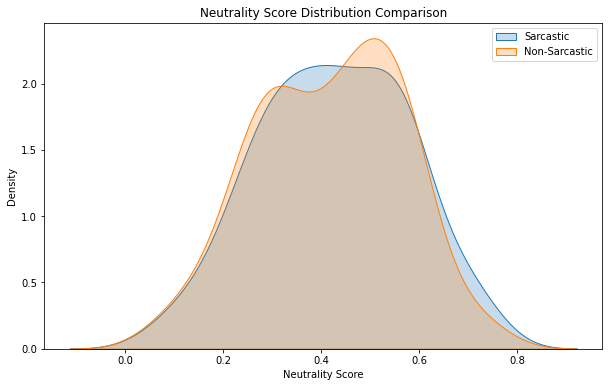

In [90]:
#Use KDE plots to compare

#Define plot size
plt.figure(figsize=(10, 6))

# Convert sentiment score dictionaries to lists
sarc_emoji_neutrality_scores = list(sarc_emoji_neutrality.values())
nonsarc_emoji_neutrality_scores = list(nonsarc_emoji_neutrality.values())

#Define plot content
sns.kdeplot(sarc_emoji_neutrality_scores, label='Sarcastic', shade=True)
sns.kdeplot(nonsarc_emoji_neutrality_scores, label='Non-Sarcastic', shade=True)

#Set axis labels, plot title and add a legend
plt.title('Neutrality Score Distribution Comparison')
plt.xlabel('Neutrality Score')
plt.ylabel('Density')
plt.legend()

#Show the plot
plt.show()

In [91]:
#Determine if there is statistical significance between the means

#First determine if parametric/non-parametric tests are suitable

#Check if the average emojis is normally distributed using the shapiro wilk test

#Perform shapiro wilk test
statistic, p_value = shapiro(sarc_emoji_neutrality_scores)

#Check the p-value to determine if the data follows a normal distribution
alpha = 0.05
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject null hypothesis)")

The data follows a normal distribution (fail to reject null hypothesis)


In [92]:
#Determine if there is statistical significance between the means

#First determine if parametric/non-parametric tests are suitable

#Check if the average emojis is normally distributed using the shapiro wilk test

#Perform shapiro wilk test
statistic, p_value = shapiro(nonsarc_emoji_neutrality_scores)

#Check the p-value to determine if the data follows a normal distribution
alpha = 0.05
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject null hypothesis)")
else:
    print("The data does not follow a normal distribution (reject null hypothesis)")

The data follows a normal distribution (fail to reject null hypothesis)


In [94]:
#Check if data meets assumption of homoscedasticity for parametric tests

#Perform Levene's test
statistic, p_value = levene(sarc_emoji_neutrality_scores, nonsarc_emoji_neutrality_scores)

#Check the p-value
if p_value > 0.05:
    print("Homoscedasticity assumption met.")
else:
    print("Homoscedasticity assumption violated.")

Homoscedasticity assumption met.


In [100]:
#Check for outliers

sarc_neut_scores = np.array(sarc_emoji_neutrality_scores)

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(sarc_neut_scores, 25)
Q3 = np.percentile(sarc_neut_scores, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = (sarc_neut_scores < lower_bound) | (sarc_neut_scores > upper_bound)

# Print the rows containing potential outliers
sarc_neut_scores[outliers]

array([], dtype=float64)

In [101]:
#Check for outliers

nonsarc_neut_scores = np.array(nonsarc_emoji_neutrality_scores)

#Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(nonsarc_neut_scores, 25)
Q3 = np.percentile(nonsarc_neut_scores, 75)

#Calculate the interquartile range (IQR)
IQR = Q3 - Q1

#Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identify potential outliers
outliers = (nonsarc_neut_scores < lower_bound) | (nonsarc_neut_scores > upper_bound)

#Print the rows containing potential outliers
nonsarc_neut_scores[outliers]

array([], dtype=float64)

In [104]:
#Check length of the two lists
print(len(sarc_emoji_neutrality_scores), len(nonsarc_emoji_neutrality_scores))

70 65


In [105]:
#Reduce the length of sarc to even out the data
sarc_emoji_neutrality_scores = random.sample(sarc_emoji_neutrality_scores, 65)
len(sarc_emoji_neutrality_scores)

65

In [106]:
#A parametric test can be used- paired T-test

#Perform paired t-test
t_statistic, p_value = stats.ttest_rel(sarc_emoji_neutrality_scores, nonsarc_emoji_neutrality_scores)

#Check the p-value to determine if the difference is significant
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Fail to reject the null hypothesis: No significant difference.


# Sentiment- basic theory

In [108]:
#Check if any basic emotions are disproportionately represented in either group- anger first

#Create an empty list
sarc_emoji_anger = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anger']
        sarc_emoji_anger[emoji] = sentiment_score
        
#Create an empty list
nonsarc_emoji_anger = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anger']
        nonsarc_emoji_anger[emoji] = sentiment_score
        
#Check one of the dictionaries
for emoji, sentiment_score in nonsarc_emoji_anger.items():
    print(f"Emoji: {emoji}, Sentiment Score: {sentiment_score:.5f}")

Emoji: 😂, Sentiment Score: 0.07499
Emoji: 😁, Sentiment Score: 0.05969
Emoji: 😭, Sentiment Score: 0.06433
Emoji: 😢, Sentiment Score: 0.07997
Emoji: 😊, Sentiment Score: 0.08079
Emoji: 😇, Sentiment Score: 0.07309
Emoji: 😒, Sentiment Score: 0.08527
Emoji: 🤔, Sentiment Score: 0.07296
Emoji: 🙂, Sentiment Score: 0.06723
Emoji: 😅, Sentiment Score: 0.06731
Emoji: 😩, Sentiment Score: 0.05863
Emoji: 💩, Sentiment Score: 0.07339
Emoji: ☺️, Sentiment Score: 0.06676
Emoji: 👏🏼, Sentiment Score: 0.07091
Emoji: 😖, Sentiment Score: 0.07074
Emoji: 🥰, Sentiment Score: 0.07351
Emoji: 😬, Sentiment Score: 0.06454
Emoji: 😳, Sentiment Score: 0.06660
Emoji: 😑, Sentiment Score: 0.07748
Emoji: 👍, Sentiment Score: 0.07728
Emoji: 😍, Sentiment Score: 0.07508
Emoji: 😔, Sentiment Score: 0.06960
Emoji: 💛, Sentiment Score: 0.07030
Emoji: 😀, Sentiment Score: 0.06445
Emoji: 😡, Sentiment Score: 0.07341
Emoji: 🙊, Sentiment Score: 0.07402
Emoji: 😱, Sentiment Score: 0.07748
Emoji: 🤗, Sentiment Score: 0.07782
Emoji: 🤠, Sentimen

In [112]:
#Check if any basic emotions are disproportionately represented in either group- joy

#Create an empty list
sarc_emoji_joy = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['joy']
        sarc_emoji_joy[emoji] = sentiment_score
        
#Create an empty list
nonsarc_emoji_joy = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['joy']
        nonsarc_emoji_joy[emoji] = sentiment_score
        

        
#Check if any basic emotions are disproportionately represented in either group- sadnesss

#Create an empty list
sarc_emoji_sadness = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['sadness']
        sarc_emoji_sadness[emoji] = sentiment_score
        
#Create an empty list
nonsarc_emoji_sadness = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['sadness']
        nonsarc_emoji_sadness[emoji] = sentiment_score
        
        
#Check if any basic emotions are disproportionately represented in either group- fear

#Create an empty list
sarc_emoji_fear = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['fear']
        sarc_emoji_fear[emoji] = sentiment_score
        
#Create an empty list
nonsarc_emoji_fear = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['fear']
        nonsarc_emoji_fear[emoji] = sentiment_score
        
        
#Check if any basic emotions are disproportionately represented in either group- surprise

#Create an empty list
sarc_emoji_surprise = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['surprise']
        sarc_emoji_surprise[emoji] = sentiment_score
        
#Create an empty list
nonsarc_emoji_surprise = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['surprise']
        nonsarc_emoji_surprise[emoji] = sentiment_score
        
        
#Check if any basic emotions are disproportionately represented in either group- disgust

#Create an empty list
sarc_emoji_disgust = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['disgust']
        sarc_emoji_disgust[emoji] = sentiment_score
        
#Create an empty list
nonsarc_emoji_disgust = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['disgust']
        nonsarc_emoji_disgust[emoji] = sentiment_score
        

#Check if any basic emotions are disproportionately represented in either group- anticipation

#Create an empty list
sarc_emoji_anticipation = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anticipation']
        sarc_emoji_anticipation[emoji] = sentiment_score
        
#Create an empty list
nonsarc_emoji_anticipation = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['anticipation']
        nonsarc_emoji_anticipation[emoji] = sentiment_score

        
        
#Check if any basic emotions are disproportionately represented in either group- trust

#Create an empty list
sarc_emoji_trust = {}

#Find the relevant information for each emoji in the list in the df
for emoji in sarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['trust']
        sarc_emoji_trust[emoji] = sentiment_score
        
#Create an empty list
nonsarc_emoji_trust = {}

#Find the relevant information for each emoji in the list in the df
for emoji in nonsarc_emojis_list:
    emoji_row = emotion_info[emotion_info['emoji'] == emoji]
    
    #If the emoji is found get the sentiment score from the row
    if not emoji_row.empty:
        sentiment_score = emoji_row.iloc[0]['trust']
        nonsarc_emoji_trust[emoji] = sentiment_score

C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\730203769.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sarc_emoji_anger_score, label='Sarcastic', shade=True, ax=axes[0, 0])
C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\730203769.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonsarc_emoji_anger_score, label='Non-Sarcastic', shade=True, ax=axes[0, 0])
C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\730203769.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sarc_emoji_joy_score, label='Sarcastic', shade=True, ax=axes[0, 1])
C:\Users\niamh\AppData\Local\Temp\ipykernel_24988\730203769.py:29: FutureW

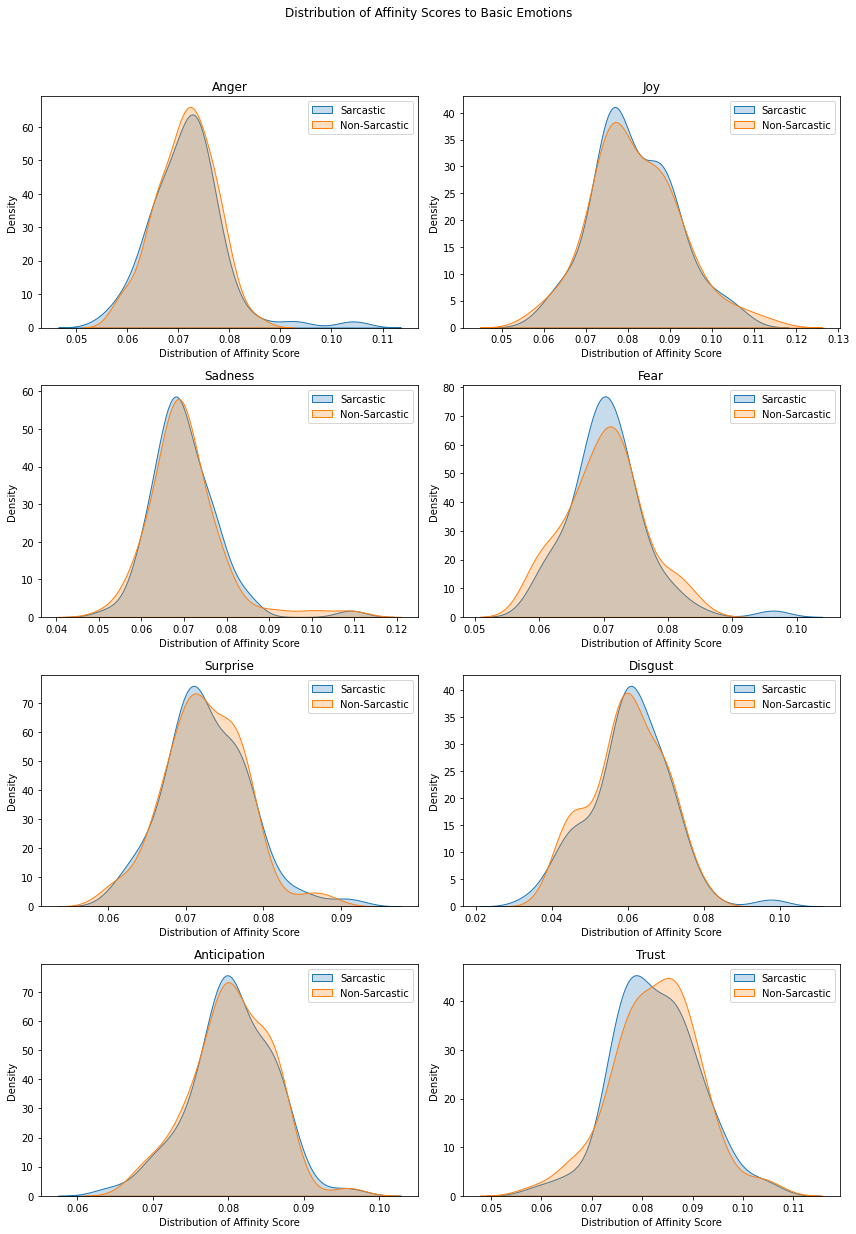

In [116]:
#Use KDE plots to compare

# Convert sentiment score dictionaries to lists
sarc_emoji_anger_score = list(sarc_emoji_anger.values())
nonsarc_emoji_anger_score = list(nonsarc_emoji_anger.values())
sarc_emoji_joy_score = list(sarc_emoji_joy.values())
nonsarc_emoji_joy_score = list(nonsarc_emoji_joy.values())
sarc_emoji_sadness_score = list(sarc_emoji_sadness.values())
nonsarc_emoji_sadness_score = list(nonsarc_emoji_sadness.values())
sarc_emoji_fear_score = list(sarc_emoji_fear.values())
nonsarc_emoji_fear_score = list(nonsarc_emoji_fear.values())
sarc_emoji_surprise_score = list(sarc_emoji_surprise.values())
nonsarc_emoji_surprise_score = list(nonsarc_emoji_surprise.values())
sarc_emoji_disgust_score = list(sarc_emoji_disgust.values())
nonsarc_emoji_disgust_score = list(nonsarc_emoji_disgust.values())
sarc_emoji_anticipation_score = list(sarc_emoji_anticipation.values())
nonsarc_emoji_anticipation_score = list(nonsarc_emoji_anticipation.values())
sarc_emoji_trust_score = list(sarc_emoji_trust.values())
nonsarc_emoji_trust_score = list(nonsarc_emoji_trust.values())


#Define layout of plots
fig, axes = plt.subplots(4, 2, figsize=(12, 18))

#Define plot content
sns.kdeplot(sarc_emoji_anger_score, label='Sarcastic', shade=True, ax=axes[0, 0])
sns.kdeplot(nonsarc_emoji_anger_score, label='Non-Sarcastic', shade=True, ax=axes[0, 0])
sns.kdeplot(sarc_emoji_joy_score, label='Sarcastic', shade=True, ax=axes[0, 1])
sns.kdeplot(nonsarc_emoji_joy_score, label='Non-Sarcastic', shade=True, ax=axes[0, 1])

sns.kdeplot(sarc_emoji_sadness_score, label='Sarcastic', shade=True, ax=axes[1, 0])
sns.kdeplot(nonsarc_emoji_sadness_score, label='Non-Sarcastic', shade=True, ax=axes[1, 0])
sns.kdeplot(sarc_emoji_fear_score, label='Sarcastic', shade=True, ax=axes[1, 1])
sns.kdeplot(nonsarc_emoji_fear_score, label='Non-Sarcastic', shade=True, ax=axes[1, 1])

sns.kdeplot(sarc_emoji_surprise_score, label='Sarcastic', shade=True, ax=axes[2, 0])
sns.kdeplot(nonsarc_emoji_surprise_score, label='Non-Sarcastic', shade=True, ax=axes[2, 0])
sns.kdeplot(sarc_emoji_disgust_score, label='Sarcastic', shade=True, ax=axes[2, 1])
sns.kdeplot(nonsarc_emoji_disgust_score, label='Non-Sarcastic', shade=True, ax=axes[2, 1])

sns.kdeplot(sarc_emoji_anticipation_score, label='Sarcastic', shade=True, ax=axes[3, 0])
sns.kdeplot(nonsarc_emoji_anticipation_score, label='Non-Sarcastic', shade=True, ax=axes[3, 0])
sns.kdeplot(sarc_emoji_trust_score, label='Sarcastic', shade=True, ax=axes[3, 1])
sns.kdeplot(nonsarc_emoji_trust_score, label='Non-Sarcastic', shade=True, ax=axes[3, 1])

#Set subplot titles
axes[0, 0].set_title('Anger')
axes[0, 1].set_title('Joy')

axes[1, 0].set_title('Sadness')
axes[1, 1].set_title('Fear')

axes[2, 0].set_title('Surprise')
axes[2, 1].set_title('Disgust')

axes[3, 0].set_title('Anticipation')
axes[3, 1].set_title('Trust')

#Add legends to each subplot
axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()
axes[2, 0].legend()
axes[2, 1].legend()
axes[3, 0].legend()
axes[3, 1].legend()

#Add axis titles for each subplot
axes[0, 0].set_xlabel('Distribution of Affinity Score')
axes[0, 0].set_ylabel('Density')
axes[0, 1].set_xlabel('Distribution of Affinity Score')
axes[0, 1].set_ylabel('Density')
axes[1, 0].set_xlabel('Distribution of Affinity Score')
axes[1, 0].set_ylabel('Density')
axes[1, 1].set_xlabel('Distribution of Affinity Score')
axes[1, 1].set_ylabel('Density')
axes[2, 0].set_xlabel('Distribution of Affinity Score')
axes[2, 0].set_ylabel('Density')
axes[2, 1].set_xlabel('Distribution of Affinity Score')
axes[2, 1].set_ylabel('Density')
axes[3, 0].set_xlabel('Distribution of Affinity Score')
axes[3, 0].set_ylabel('Density')
axes[3, 1].set_xlabel('Distribution of Affinity Score')
axes[3, 1].set_ylabel('Density')

#Set overall title
plt.suptitle('Distribution of Affinity Scores to Basic Emotions')

#Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#Show the plot
plt.show()

# Sentiment Congruency between Emoji and Words in Test

In [117]:
#Importing libraries
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

In [118]:
#Use the same sentiment polarity model as before
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

#Create the sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)